## Quantium Data Analytics Virtual Experience Program
### Task 1: Data preparation and customer analytics
Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.
#### Author: Akshay Pandurang Paunikar

#### Here is the background information on your task
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.
The insights from your analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

You have received the following email from your manager, Zilinka.

'Hi, 

Welcome again to the team, we love having new graduates join us! 

I just wanted to send a quick follow up from our conversation earlier with a few pointers around the key areas of this task to make sure we set you up for success. 

Below I have outlined your main tasks along with what we should be looking for in the data for each. 

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  

Looking forward to reviewing your work. 

Thanks, 

Zilinka'

#### Here is your task
We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. If you aren’t familiar with R or Python we would recommend searching a few online courses to help get you started. We have also provided an R solution template if you want some assistance in getting through this Task. Whilst its possible to complete the task in Excel you may find the size of the data and the nature of the tasks is such that it is more difficult to complete in Excel.

To get started, download the resource csv data files below and begin performing high level data checks such as:
 - Creating and interpreting high level summaries of the data
 - Finding outliers and removing these (if applicable)
 - Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.

As we are in the early stages of this analysis Zilinka has asked us to submit our initial findings, so please save your code as a .pdf file and upload it to unlock the model answer.

Note: that this is an open-ended case study that can be approached in many ways. Model answer is in R. 

In [57]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [58]:
# set the working directory
import io
%cd "E:\FORAGE\Quantium\Task 1 - Data preparation and customer analytics"

e:\FORAGE\Quantium\Task 1 - Data preparation and customer analytics


In [59]:
# load the datasets
purchase_data = pd.read_csv("QVI_purchase_behaviour.csv")
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")

In [60]:
# let's check the dimensions of our datasets
print("Purchase Data:\n", purchase_data.shape)
print("Transaction Data:\n", transaction_data.shape)

Purchase Data:
 (72637, 3)
Transaction Data:
 (264836, 8)


As you can see there are 72637 records in purchase data and 264836 records in transaction data.

In [61]:
# First 5 records from each data
print("Purchase Data:")
purchase_data.head()

Purchase Data:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

In [62]:
print("Transaction Data:")
transaction_data.head()

Transaction Data:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [63]:
# Datatypes in each data
print("Purchase Data:")
purchase_data.dtypes

Purchase Data:


LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [64]:
print("Transaction Data:")
transaction_data.dtypes

Transaction Data:


DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [65]:
# Descriptive Statistics
print("Purchase Data:")
purchase_data.describe(include='all')

Purchase Data:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [66]:
print("Transaction Data:")
transaction_data.dtypes

Transaction Data:


DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [67]:
# data info
print("Purchase Data:")
purchase_data.info()

Purchase Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [68]:
print("Transaction Data:")
transaction_data.info()

Transaction Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [69]:
# Check for null/missing values
print("Purchase Data:", purchase_data.isnull().sum())
print()
print("Transaction Data:", transaction_data.isnull().sum())

Purchase Data: LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Transaction Data: DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [70]:
# Duplicate records
print("Purchase Data:", purchase_data.duplicated().sum())
print()
print("Transaction Data:", transaction_data.duplicated().sum())

Purchase Data: 0

Transaction Data: 1


As you can see that there are no null or missing values in our datasets. However, there is one duplicate record in transaction data.

In [71]:
transaction_data[transaction_data.duplicated()==True]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [72]:
transaction_data[transaction_data['TXN_ID']==108462]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124844,2018-10-01,107,107024,108462,18,Cheetos Chs & Bacon Balls 190g,2,6.6
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


As you can see from above the TXN_ID = 108462 has duplicate record for PROD_NBR = 45 and PROD_NAME = Smiths Thinly Cut Roast Chicken 175g. We will drop this record.

In [73]:
transactions_data = transaction_data.drop_duplicates(inplace=True)
transaction_data.shape

(264835, 8)

In [74]:
retail_data = pd.merge(transaction_data, purchase_data, on='LYLTY_CARD_NBR')
retail_data.shape

(264835, 10)

In [75]:
retail_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [76]:
retail_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [77]:
retail_data.duplicated().sum()

0

So we have merged our data and we checked for any null values and duplicate records and we found none.

Now, our task is to understand the types of customers who purchase Chips and their purchasing behaviour within the region. So, we need products containing Chips only.

In [78]:
retail_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn Chp     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot

Below is the list of products which are not chips. However, we kept the products which have shapes like the chips.

In [79]:
exclude_list = [ 'Old El Paso Salsa   Dip Tomato Mild 300g',
            'Old El Paso Salsa   Dip Tomato Med 300g'
            'Twisties Cheese     270g',
            'Infzns Crn Crnchers Tangy Gcamole 110g'
            'RRD SR Slow Rst     Pork Belly 150g',
            'Burger Rings 220g',
            'Cheezels Cheese Box 125g',
            'Old El Paso Salsa   Dip Chnky Tom Ht300g',
            'Twisties Chicken270g',
            'RRD Steak &         Chimuchurri 150g',
            'Woolworths Mild     Salsa 300g',
            'Woolworths Medium   Salsa 300g',
            'Infuzions SourCream&Herbs Veg Strws 110g',
            'Cheezels Cheese 330g',
            'Twisties Cheese     Burger 250g',
            'Cheetos Puffs 165g',
            'Woolworths Cheese   Rings 190g',
            'Cheetos Chs & Bacon Balls 190g']

Now we will remove above all products from our data.

In [80]:
chips_data = retail_data[~retail_data['PROD_NAME'].isin(exclude_list)]
chips_data.shape

(234166, 10)

In [81]:
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [82]:
chips_data['NET_WEIGHT'] = chips_data['PROD_NAME'].str[-4:]
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,NET_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160g
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175g
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g


In [83]:
chips_data['NET_WEIGHT'].value_counts()

175g    64928
150g    40178
134g    25102
170g    19983
110g    19253
165g    13849
330g     9391
380g     6418
300g     6035
200g     4473
Salt     3257
210g     3167
270g     3115
210G     3105
 90g     3008
160g     2970
 70g     1507
150G     1498
180g     1468
175G     1461
Name: NET_WEIGHT, dtype: int64

In [84]:
chips_data['NET_WEIGHT'] = chips_data['NET_WEIGHT'].replace('Salt', '135g')
chips_data['NET_WEIGHT'] = chips_data['NET_WEIGHT'].replace('175G', '175g')
chips_data['NET_WEIGHT'] = chips_data['NET_WEIGHT'].replace('150G', '150g')
chips_data['NET_WEIGHT'] = chips_data['NET_WEIGHT'].replace('210G', '210g')

In [85]:
chips_data['YEAR'] = chips_data['DATE'].dt.year
chips_data['MONTH'] = chips_data['DATE'].dt.month_name()
chips_data['DAY'] = chips_data['DATE'].dt.day_name()

In [86]:
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,NET_WEIGHT,YEAR,MONTH,DAY
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175g,2018,October,Wednesday
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175g,2019,May,Tuesday
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160g,2018,November,Saturday
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175g,2019,March,Saturday
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170g,2019,May,Monday


In [87]:
chips_data = chips_data.sort_values(by='DATE',ascending=True).reset_index(drop=True)
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,NET_WEIGHT,YEAR,MONTH,DAY
0,2018-07-01,104,104138,104566,101,Doritos Salsa Medium 300g,2,5.2,OLDER SINGLES/COUPLES,Premium,300g,2018,July,Sunday
1,2018-07-01,194,194349,194710,7,Smiths Crinkle Original 330g,2,11.4,OLDER SINGLES/COUPLES,Premium,330g,2018,July,Sunday
2,2018-07-01,19,19009,15816,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,RETIREES,Budget,330g,2018,July,Sunday
3,2018-07-01,104,104092,104274,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,OLDER SINGLES/COUPLES,Mainstream,300g,2018,July,Sunday
4,2018-07-01,179,179213,180682,32,Kettle Sea Salt And Vinegar 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,175g,2018,July,Sunday


Now, we will perform some Exploratory Data Analysis (EDA) on above dataset.

Count of Stores in data.

In [88]:
# count of STORE_NBR
chips_data['STORE_NBR'].value_counts()

226    1817
88     1664
165    1634
93     1620
237    1587
       ... 
31        2
11        2
193       2
76        1
92        1
Name: STORE_NBR, Length: 272, dtype: int64

As you can see that there are total 272 Stores in our data which is quite a large number. So we will now group our data by STORE_NBR and analyze the top 10 stores by average sales. 

In [89]:
# Top 10 Stores by total Sales
top10stores = chips_data.groupby(['STORE_NBR'])['TOT_SALES'].sum().sort_values(ascending=False).head(10)
top10stores

STORE_NBR
226    16996.65
88     14362.85
165    14220.25
237    13711.50
40     13591.20
58     13347.55
199    13003.60
203    12943.30
4      12911.35
201    12874.20
Name: TOT_SALES, dtype: float64

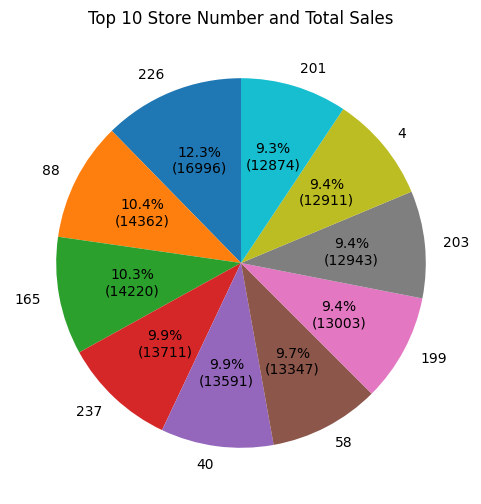

In [90]:
# Let's visualize above data using a pie chart
labels = top10stores.index
values = top10stores.values

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(values, labels=labels, autopct = lambda pct: func(pct, values), shadow=False, startangle=90)
plt.title("Top 10 Store Number and Total Sales")
plt.show()

Above pie chart shows the top 10 Store Number and their total sales.

#### Total and Average Sales by Date

In [91]:
chips_data.groupby(['DATE'])['TOT_SALES'].sum().sort_values(ascending=False)

DATE
2018-12-24    6130.10
2018-12-23    6049.40
2018-12-22    5811.10
2018-12-19    5793.00
2018-12-20    5640.80
               ...   
2019-05-16    3717.45
2018-08-17    3640.55
2019-05-17    3589.45
2019-05-18    3575.10
2019-05-15    3548.10
Name: TOT_SALES, Length: 364, dtype: float64

In [92]:
chips_data.groupby(['DATE'])['TOT_SALES'].mean().sort_values(ascending=False)

DATE
2019-02-21    7.696607
2019-06-13    7.623924
2018-12-10    7.584360
2018-12-31    7.575840
2019-01-13    7.568063
                ...   
2018-08-14    5.963835
2019-05-17    5.942798
2019-05-19    5.892055
2018-08-18    5.882371
2019-05-14    5.704056
Name: TOT_SALES, Length: 364, dtype: float64

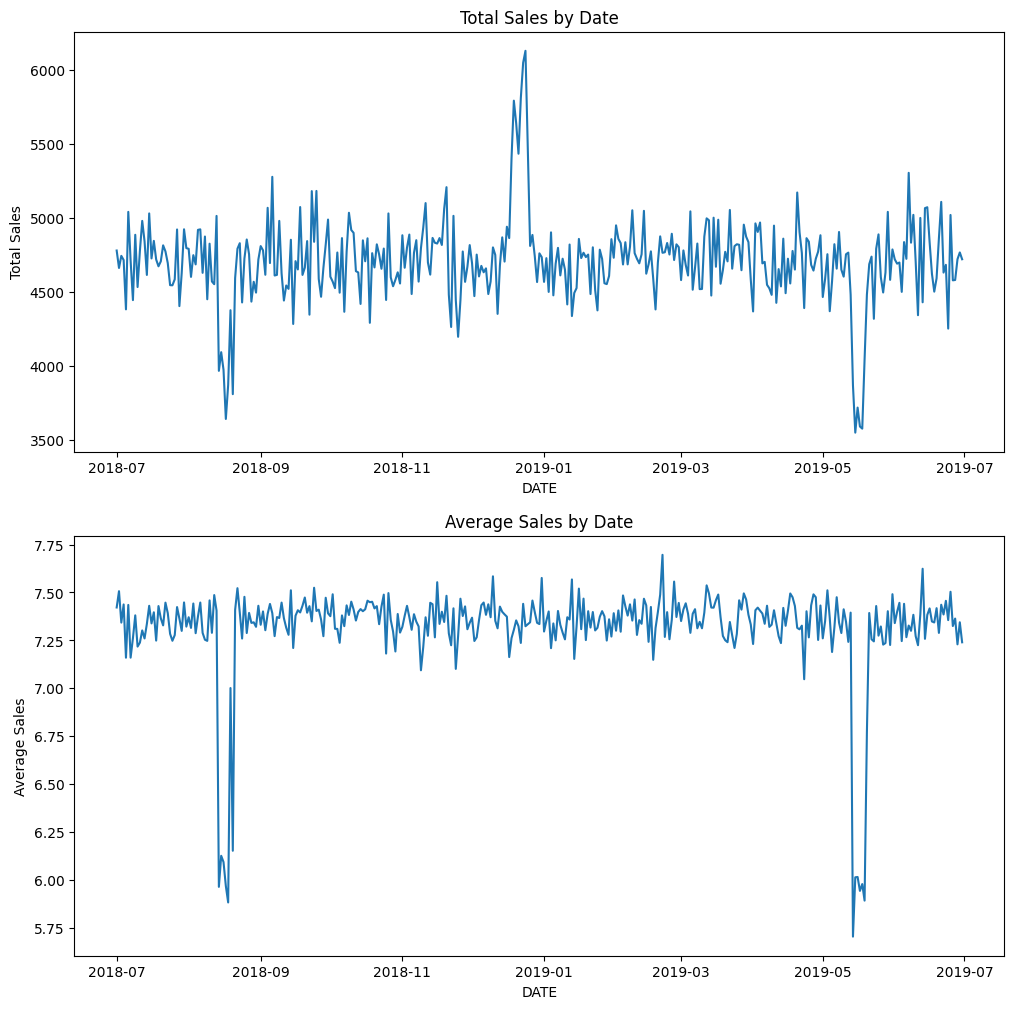

In [93]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.lineplot(x='DATE', y='TOT_SALES', data=chips_data, estimator=np.sum,ci=None)
plt.xlabel('DATE')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')

plt.subplot(2,1,2)
sns.lineplot(x='DATE', y='TOT_SALES', data=chips_data, estimator=np.mean,ci=None)
plt.xlabel('DATE')
plt.ylabel('Average Sales')
plt.title('Average Sales by Date')


plt.show()

As you can see from above linecharts, the Total Sales were Higher in the month of December 2018 and Lower in the month of August 2018 and May 2019. Also, the Average Sales were Higher in the month of February 2019 and Lower in the month of August 2018 and May 2019.

#### Total and Average Sales by Month

In [94]:
chips_data.groupby(['MONTH'])['TOT_SALES'].sum()

MONTH
April        141411.90
August       140502.25
December     148262.70
February     133655.90
January      144064.90
July         146441.10
June         142415.60
March        147462.60
May          138765.95
November     142193.60
October      145041.30
September    142344.30
Name: TOT_SALES, dtype: float64

In [95]:
chips_data.groupby(['MONTH'])['TOT_SALES'].mean()

MONTH
April        7.360986
August       7.095715
December     7.364163
February     7.384304
January      7.341261
July         7.339302
June         7.357698
March        7.376449
May          7.043599
November     7.343952
October      7.379359
September    7.383386
Name: TOT_SALES, dtype: float64

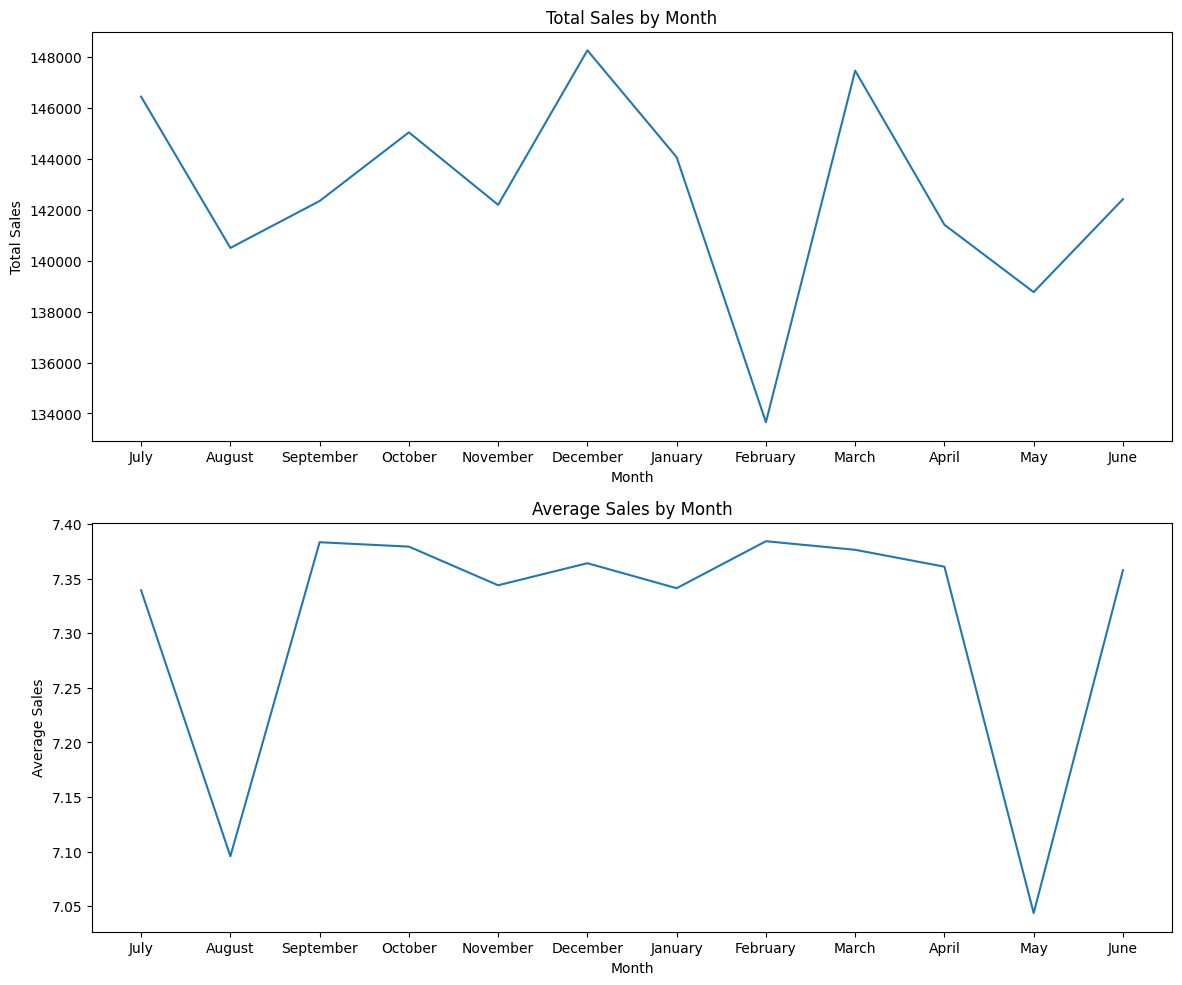

In [96]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.lineplot(x='MONTH', y='TOT_SALES', data=chips_data, ci=None, estimator=np.sum)
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

plt.subplot(2,1,2)
sns.lineplot(x='MONTH', y='TOT_SALES', data=chips_data, ci=None, estimator=np.mean)
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Average Sales')
plt.title('Average Sales by Month')

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.0, hspace=0.2)

plt.show()

From above linecharts we observed that the Total Sales were Higher in the Month of December 2018 and Lower in the Month of February 2019. Also, The Average Sales are Higher from the month of September 2018 to April 2019 and are Lower in the month of August 2018 and May 2019.

#### Total and Average Sales by Day

In [97]:
chips_data.groupby(['DAY'])['TOT_SALES'].sum()

DAY
Friday       247652.30
Monday       243965.35
Saturday     243440.30
Sunday       250711.10
Thursday     241587.55
Tuesday      239839.50
Wednesday    245366.00
Name: TOT_SALES, dtype: float64

In [98]:
chips_data.groupby(['DAY'])['TOT_SALES'].mean()

DAY
Friday       7.317682
Monday       7.324087
Saturday     7.295622
Sunday       7.320887
Thursday     7.306222
Tuesday      7.304163
Wednesday    7.325014
Name: TOT_SALES, dtype: float64

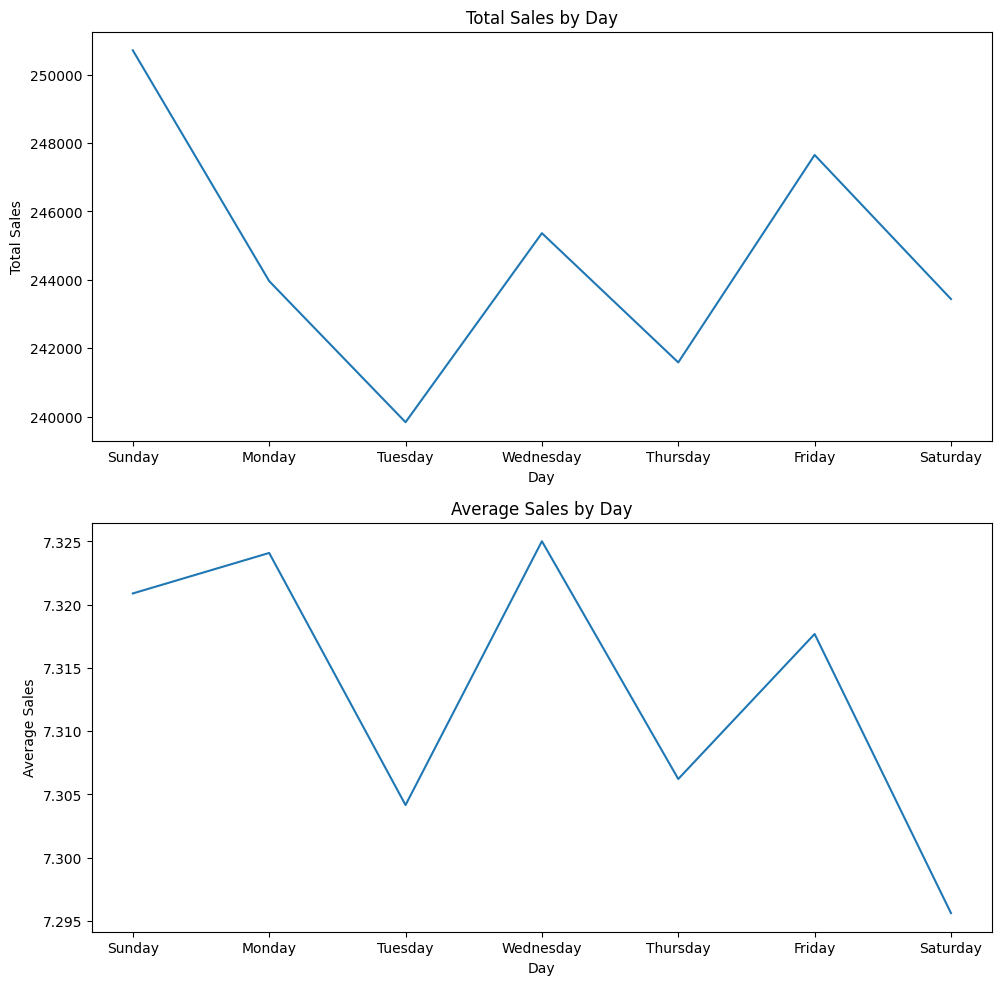

In [99]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.lineplot(x='DAY', y='TOT_SALES', data=chips_data, ci=None, estimator=np.sum)
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Total Sales')
plt.title('Total Sales by Day')

plt.subplot(2,1,2)
sns.lineplot(x='DAY', y='TOT_SALES', data=chips_data, ci=None, estimator=np.mean)
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Average Sales')
plt.title('Average Sales by Day')

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.0, hspace=0.2)

plt.show()

From above linecharts, we can say that the Total Sales are higher on Sunday, Wednesday and Friday and lower on rest of the days. Also, Average Sales are lower on Tuesday and Thursday as compared to rest of the days of week.

#### Total Sales according to the Lifestage

In [100]:
chips_data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     48259
RETIREES                  44088
OLDER FAMILIES            42803
YOUNG FAMILIES            38423
YOUNG SINGLES/COUPLES     32243
MIDAGE SINGLES/COUPLES    22198
NEW FAMILIES               6152
Name: LIFESTAGE, dtype: int64

In [101]:
chips_data.groupby(['LIFESTAGE'])['TOT_SALES'].sum()

LIFESTAGE
MIDAGE SINGLES/COUPLES    163206.10
NEW FAMILIES               44984.35
OLDER FAMILIES            312410.10
OLDER SINGLES/COUPLES     356887.05
RETIREES                  324723.10
YOUNG FAMILIES            279255.70
YOUNG SINGLES/COUPLES     231095.70
Name: TOT_SALES, dtype: float64

In [102]:
chips_data.groupby(['LIFESTAGE'])['TOT_SALES'].mean()

LIFESTAGE
MIDAGE SINGLES/COUPLES    7.352288
NEW FAMILIES              7.312151
OLDER FAMILIES            7.298790
OLDER SINGLES/COUPLES     7.395243
RETIREES                  7.365340
YOUNG FAMILIES            7.267931
YOUNG SINGLES/COUPLES     7.167314
Name: TOT_SALES, dtype: float64

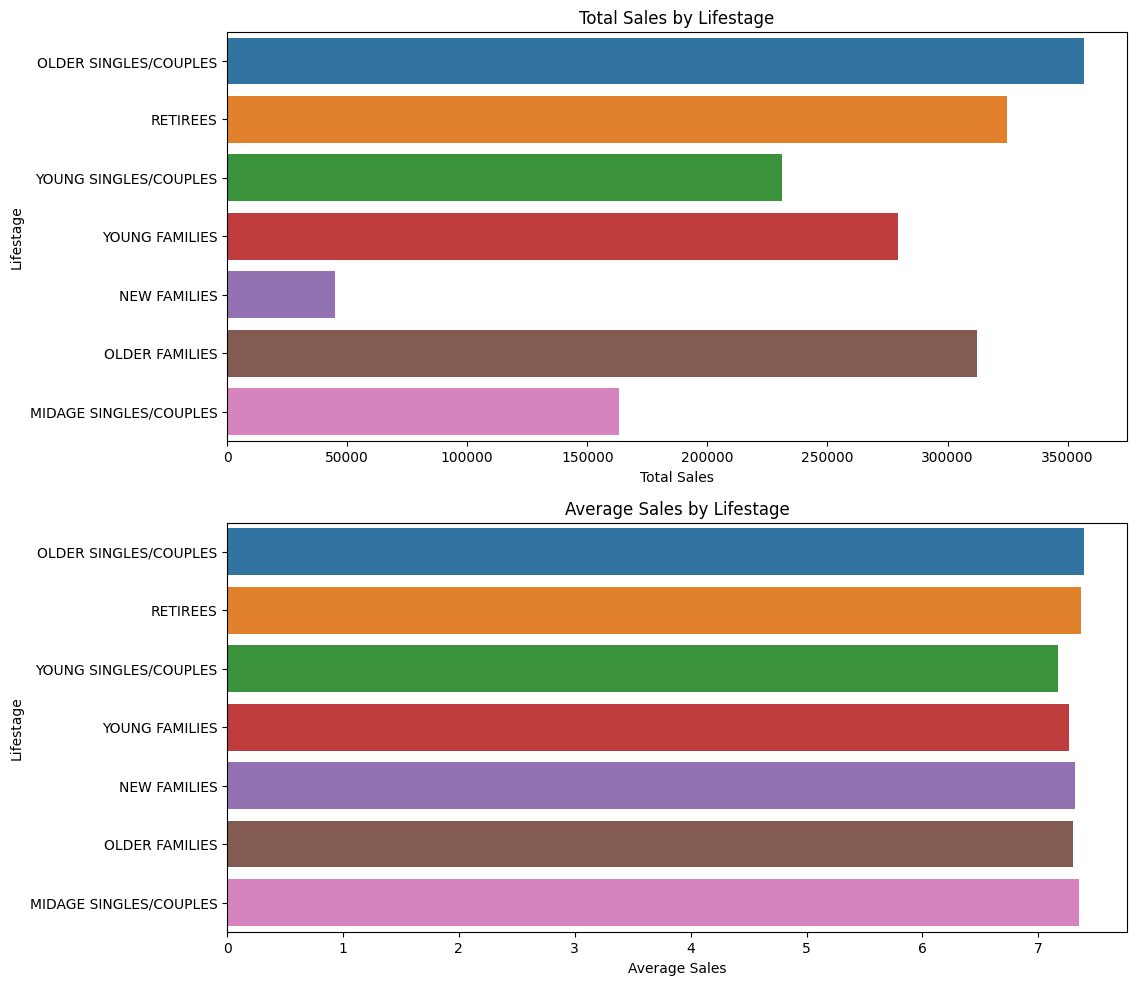

In [103]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.barplot(y='LIFESTAGE', x='TOT_SALES', data=chips_data, ci=None, estimator=np.sum, orient='h')
plt.xticks(rotation=0)
plt.xlabel('Total Sales')
plt.ylabel('Lifestage')
plt.title('Total Sales by Lifestage')

plt.subplot(2,1,2)
sns.barplot(y='LIFESTAGE', x='TOT_SALES', data=chips_data, ci=None, estimator=np.mean, orient='h')
plt.xticks(rotation=0)
plt.xlabel('Average Sales')
plt.ylabel('Lifestage')
plt.title('Average Sales by Lifestage')

plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.0, hspace=0.2)

plt.show()

From above barplots we can say that the average sales are nearly same for all the Lifestage. However, if we consider Total Sales then NEW FAMILIES and MIDAGE SINGLES/COUPLES have lower sales than the rest of the Lifestages.

#### Total Sales according to Premium Customer

In [104]:
chips_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    90249
Budget        82403
Premium       61514
Name: PREMIUM_CUSTOMER, dtype: int64

In [105]:
chips_data.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

PREMIUM_CUSTOMER
Budget        599043.65
Mainstream    664779.90
Premium       448738.55
Name: TOT_SALES, dtype: float64

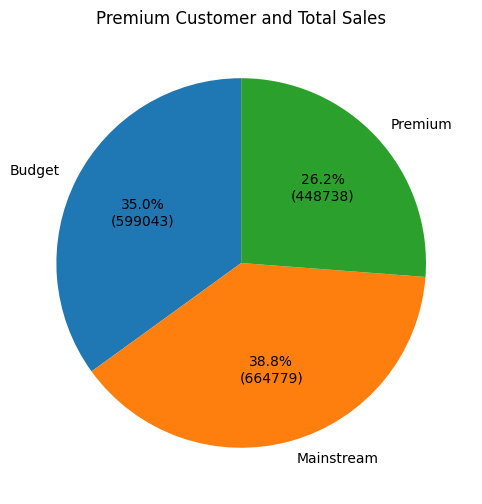

In [106]:
# Let's visualize above data using a pie chart
labels = chips_data.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().index
values = chips_data.groupby(['PREMIUM_CUSTOMER'])['TOT_SALES'].sum().values

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(values, labels=labels, autopct = lambda pct: func(pct, values), shadow=False, startangle=90)
plt.title("Premium Customer and Total Sales")
plt.show()

Maximum Sales are achieved through Mainstream Customers 38.8% and Budget Customers 35.0%.

#### NET WEIGHT Analysis

In [107]:
chips_data['NET_WEIGHT'].value_counts()

175g    66389
150g    41676
134g    25102
170g    19983
110g    19253
165g    13849
330g     9391
380g     6418
210g     6272
300g     6035
200g     4473
135g     3257
270g     3115
 90g     3008
160g     2970
 70g     1507
180g     1468
Name: NET_WEIGHT, dtype: int64

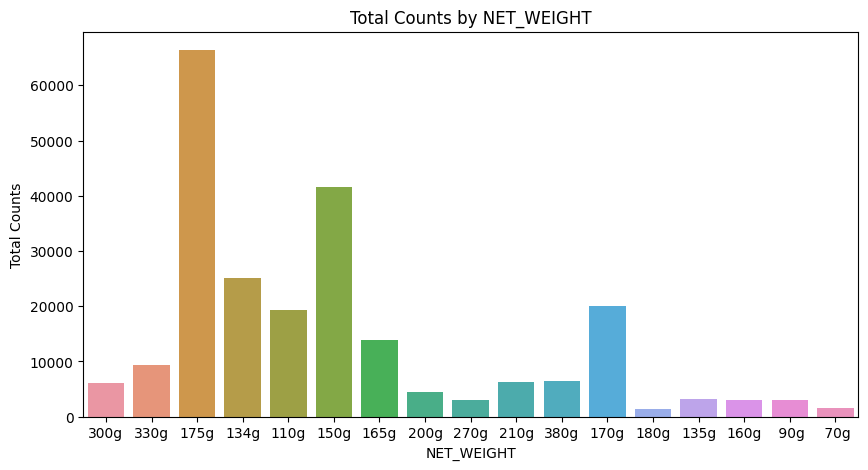

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x='NET_WEIGHT', data=chips_data)
plt.xlabel('NET_WEIGHT')
plt.xticks(rotation=0)
plt.ylabel('Total Counts')
plt.title('Total Counts by NET_WEIGHT')
plt.show()

From above countplot we can say that people prefer packet size 175g than rest of the others.

#### Product Quantity Analysis

In [109]:
chips_data['PROD_QTY'].value_counts()

2      208808
1       24238
5         395
3         374
4         349
200         2
Name: PROD_QTY, dtype: int64

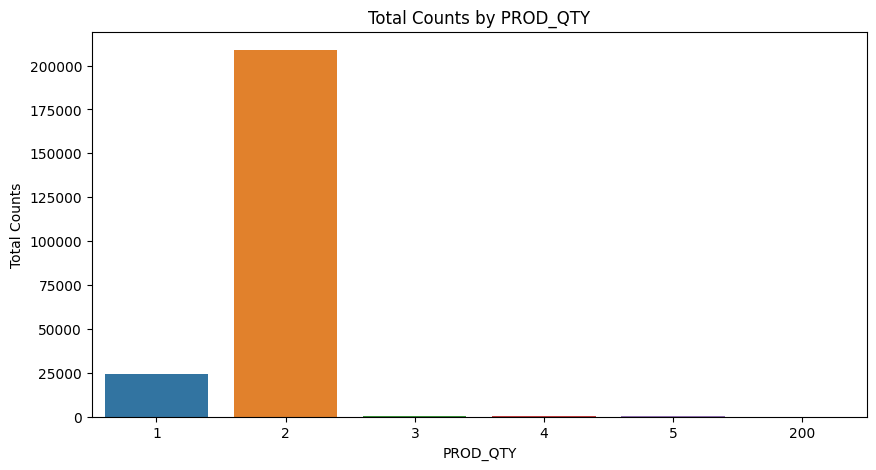

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(x='PROD_QTY', data=chips_data)
plt.xlabel('PROD_QTY')
plt.xticks(rotation=0)
plt.ylabel('Total Counts')
plt.title('Total Counts by PROD_QTY')
plt.show()

From above countplot we can say that people prefer buying in quantities of 2 than the rest others.

In [111]:
chips_data.to_csv("final_data.csv")

### Summary

 - We should increase the supply during the month of December as it has shown highest total sales due to Christmas and New Year.
 - People prefer buying on Sunday, Wednesday and Friday, so we can give some special discounts on these days to increase sales.
 - NEW FAMILIES and MIDAGE SINGLES/COUPLES are the Lifestages where we are observing lower sales so we should come up with some offers to them or we can also give some exciting offers to rest of the Lifestage People who are generating higher sales so that that they will buy more products to increase sales.
 - We should target Mainstream and Budget Customers as they are driving maximum sales to us.
 - People prefer buying packets with size 175g. Hence, we need to come up with some excitimg offers/discounts on that packet size to increase the sales.
 - People also prefer buying in quantity of 2, so we should give some offers/discounts to people who buy 2 packets of Chips to increase our sales.